In [1]:
# The mandatory libraries import step
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib nbagg

<h1>Bagging, Random Forests and ExtraTress</h1>
<p>In this notebook we will look at the __Random Forest__ and the __Extra Trees__ tehchniques through a classification problem.</p>

<h3>Bagging</h3>
<p>The first step for both of these methods is the application of the __Bootstrap Aggregating__ technique or __Bagging__. Bagging consists in creating $n$ subsets from the original dataset using random draw with replacement.
In other words each subset contains $m$ randomly selected samples with $m<N$ where $N$ is the total number of samples in the dataset and one sample can be found in several different subsets (hence "with replacement").<br>
We will not worry about the numerical implementation of bagging and let python and ``scikit`` do it in the background.</p>

<h3>Random Forest</h3>
<p>Let's first have a look at the Random Forest classification algorithm out-of-the-bag applied on the iris dataset.</p>

In [1]:
# loading the iris dataset and focusing on just two features
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,0:3:2]
y = iris.target

<p>Now training the Random Forest classifier :</p>

In [2]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

<p>You probably have noticed that many parameters are the same as for the Decision Tree classifier... well that's expected as Random Forest is based on Decision Tree.
The only other parameter we will consider here is ``n_estimators`` which controls the number of trees we want in the forest.</p>
<p>But let's go back to the classification and see how Random Forest performs on the iris dataset :</p>

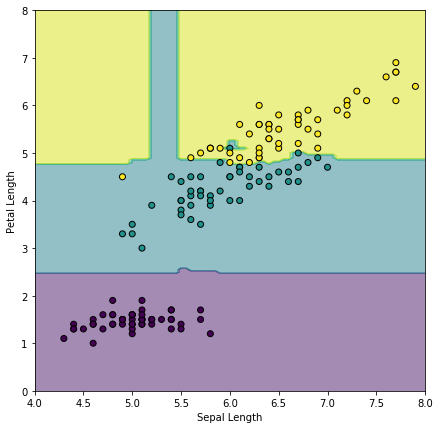

In [4]:
# create the grid
xx, yy = np.meshgrid(np.linspace(0.0,10.0,201), np.linspace(0.0,10.0,201))

# predict...
pred_rfc = rfc.predict(np.c_[xx.ravel(),yy.ravel()])
Z_rfc = pred_rfc.reshape(np.shape(xx))

# and visualise
fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.contourf(xx, yy, Z_rfc, alpha=0.5)
ax.scatter(X.T[0], X.T[1], c=iris['target'], edgecolors='k')
ax.set_xlim(4.0,8.0)
ax.set_ylim(0.0,8.0)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length');

<p>Can you spot some differences with the other classification methods we tried ?<br>
There are not big but there are differences...</p>
<p>Additional question :<br>
We have seen in the previous tutorial on Decision Tree that the boundaries were "square" because we use binary and univariate trees.
If Random Forest is based on Decision Tree why aren't the boundaries squared as well in the present case ?<br>
_Hint : If you've understood how Random Forest is built then the answer is almost straightforward._</p>
<p>Below try play a bit with the different parameters.</p> 

In [ ]:
# I leave this cell empty for you try different parameters values



<h3>Extra (Randomized) Trees</h3>
<p>Random Forest introduce some _"controlled"_ randomness when building the trees but the decision at a node is still made in an optimal way (using _Gini index_ or _entropy_ for instance).
However there exists a variant of the Random Forest which even randomly split the data at each node, it's named Extra Trees.
Let's see how it performs :</p>

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
etr = ExtraTreesClassifier()
etr.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

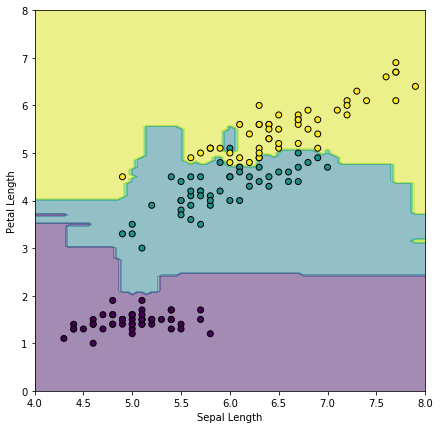

In [12]:
# create the grid
xx, yy = np.meshgrid(np.linspace(0.0,10.0,201), np.linspace(0.0,10.0,201))

# predict...
pred_etr = etr.predict(np.c_[xx.ravel(),yy.ravel()])
Z_etr = pred_etr.reshape(np.shape(xx))

# and visualise
fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.contourf(xx, yy, Z_etr, alpha=0.5)
ax.scatter(X.T[0], X.T[1], c=iris['target'], edgecolors='k')
ax.set_xlim(4.0,8.0)
ax.set_ylim(0.0,8.0)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length');

<p>Before making up your mind about the quality of the Random Forest and the Extra Trees algorithms I would recommend you to play around with both algorithms and see how well they can perform.</p>
<p>Don't forget to look at the documentation :
<ul>
<li>For Random Forest : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</li>
<li>For Extra Trees : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html</li>
</ul>

In [ ]:
# Your turn now... :)

